In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [63]:
df = pd.read_csv(r'C:\Users\nicolas.sales\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\EnergyProduction.csv', index_col=0, parse_dates=True)

In [65]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [67]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

# Frequency the first day of the month

In [70]:
df.index.freq = 'MS'

In [72]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

# Plot

<Axes: xlabel='DATE'>

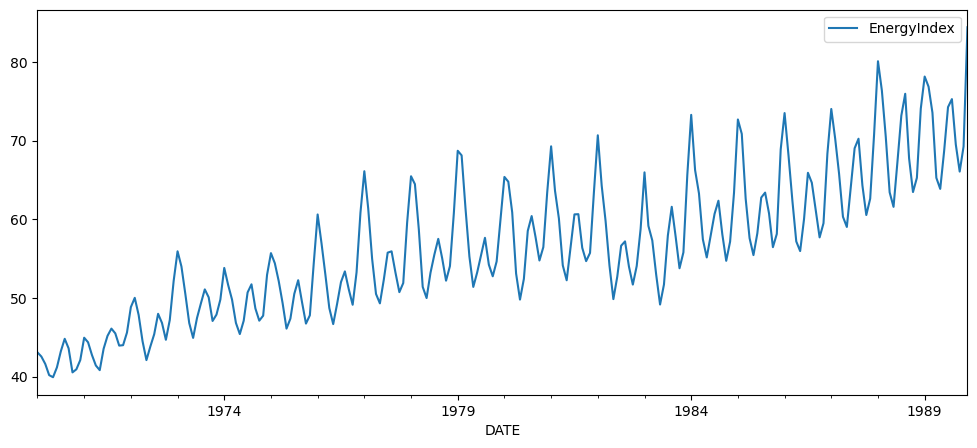

In [75]:
df.plot(figsize=(12,5))

# Simple Moving Average

In [78]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()

<Axes: xlabel='DATE'>

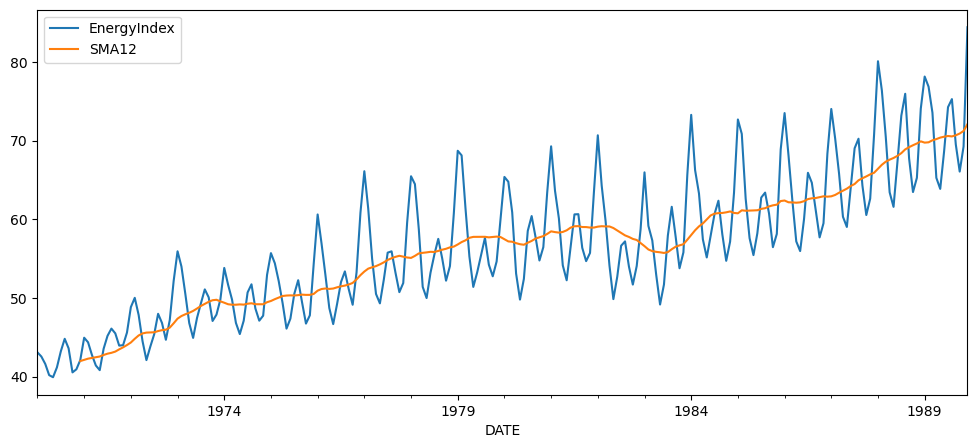

In [80]:
df.plot(figsize=(12,5))

# Exponentially Weighted Moving Average (EWMA)

N = 12 -> par an
alpha = 2/(N+1)

<Axes: xlabel='DATE'>

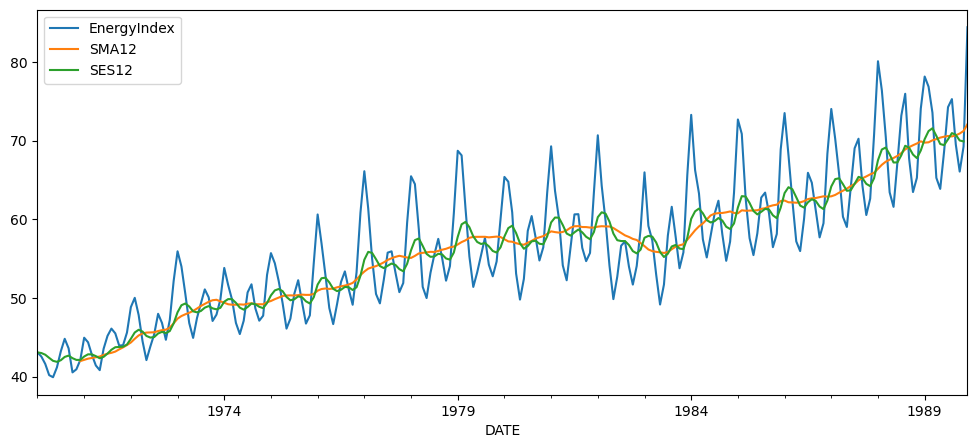

In [84]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1), optimized=False).fittedvalues.shift(-1)

df.plot(figsize=(12,5))

In [86]:
df.head()

,EnergyIndex,SMA12,SES12
DATE,,,
1970-01-01,43.0869,NaN,43.086900
1970-02-01,42.5577,NaN,43.005485
1970-03-01,41.6215,NaN,42.792564
1970-04-01,40.1982,NaN,42.393431
1970-05-01,39.9321,NaN,42.014765


# Triple Exponential Smoothing with multiplicative models

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

<Axes: xlabel='DATE'>

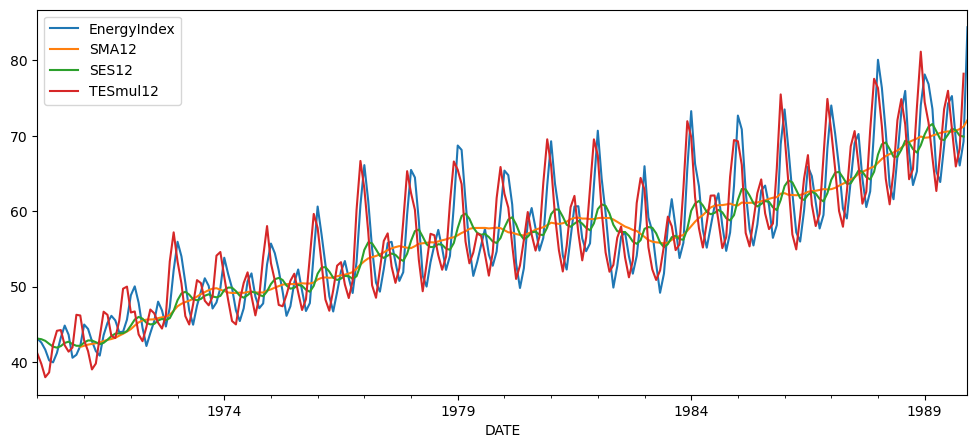

In [91]:
df.plot(figsize=(12,5))

# First two years

In [97]:
df.columns

Index(['EnergyIndex', 'SMA12', 'SES12', 'TESmul12'], dtype='object')

<Axes: xlabel='DATE'>

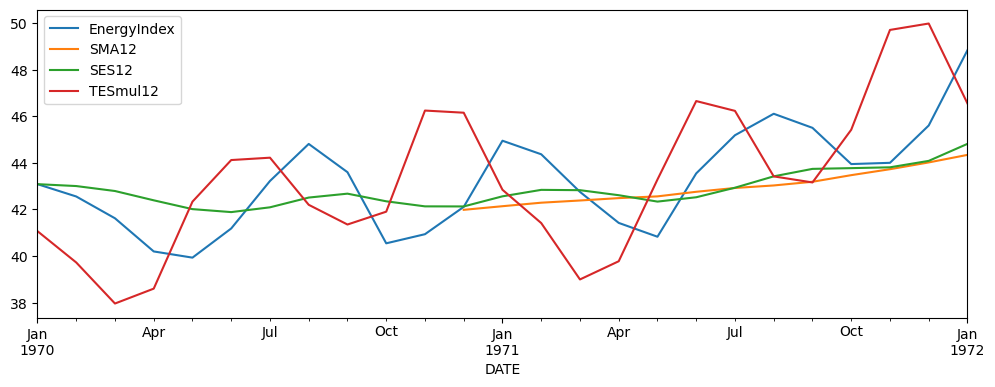

In [105]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].iloc[:25].plot(figsize=(12,4))

<Axes: xlabel='DATE'>

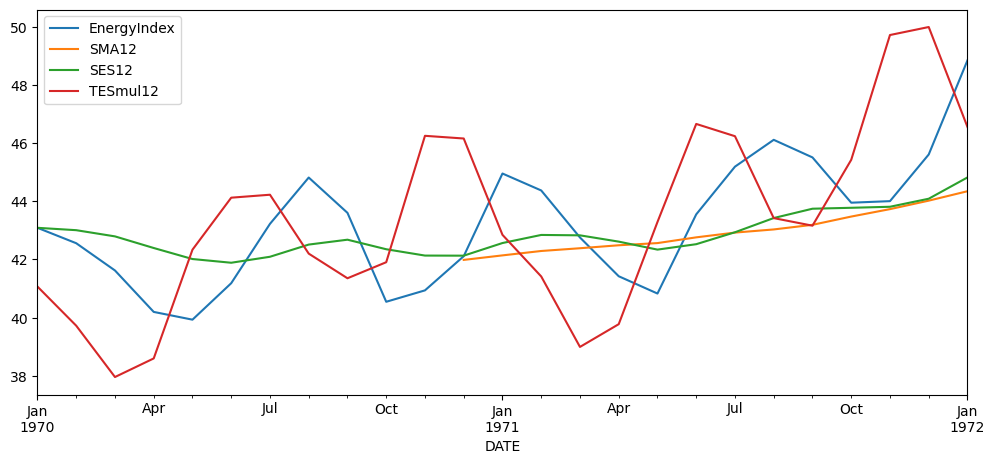

In [103]:
df[:'1972-01-01'].plot(figsize=(12,5))